In [1]:
#%matplotlib Tk
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import hbar
from sympy import Matrix
from matplotlib.animation import FuncAnimation, ArtistAnimation

#plt.style.use('seaborn-pastel')

# Here is simulated the evolution of a two-levels systems

paper = https://arxiv.org/pdf/1906.04478.pdf

Without an external field
$$ H = E_0 \ket{0}\bra{0} + E_1 \ket{1}\bra{1} =  E \ket{1}\bra{1} = 
\begin{pmatrix}
  0 & 0\\ 
  0 & E
\end{pmatrix} $$
where $ E_0 = 0 $ and $ E_1 = E $.

With a laser ligth
$$ H = E \ket{1}\bra{1} + \Omega(\ket{1}\bra{0} + \ket{0}\bra{1}) = 
\begin{pmatrix}
  0 & \Omega\\ 
  \Omega & E
\end{pmatrix} $$


In [2]:
def rho_dot(H, rho):
    return -1j*(np.dot(H,rho)-np.dot(rho, H))

def evolution(steps, dt, initial_state, H):
    state = initial_state
    state_evolution = [state]
    for i in range(steps):
        state = state + rho_dot(H, state)*dt
        state_evolution.append(state)
    return state_evolution

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


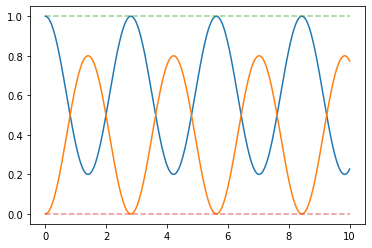

In [3]:
dt = 0.00001
rho_0 = np.array([[1,0],[0,0]])#np.array([[1/2,1/np.sqrt(2)],[1/np.sqrt(2),1/2]])
steps = 1000000
Om = 1
delta = 1
H = np.array([[0,Om],[Om, delta]])

evo = evolution(steps, dt, rho_0, H)
rho_00 = [evo[i][0,0] for i in range(steps+1)]
rho_11 = [evo[i][1,1] for i in range(steps+1)]
times = np.linspace(0,dt*(steps+1), steps+1)

plt.plot(times, rho_00)
plt.plot(times, rho_11)
plt.plot([0,times[-1]],[1,1],"--", alpha=0.5)
plt.plot([0,times[-1]],[0,0],"--", alpha=0.5)
plt.show()

Now add the interaction with the vacum

$$ H = 
\begin{pmatrix}
  0 & \Omega\\ 
  \Omega & E
\end{pmatrix} $$

and the enviroment described by the lindblad master equation

$$ \dot{\rho} = -i[H,\rho] + \Gamma (\sigma^- \rho \sigma^+ - \frac{1}{2} \{\sigma^- \sigma^+, \rho\}) =
-i(H \rho - \rho H) + \Gamma(\sigma^- \rho \sigma^+ -  \frac{1}{2} (\sigma^- \sigma^+ \rho\ + \rho \sigma^- \sigma^+ ))
$$ 

where
$$ \sigma^+ =
\begin{pmatrix}
  0 & 0\\ 
  1 & 0
\end{pmatrix} \ \ \text{ and } \ \ \ \
\sigma^- =
\begin{pmatrix}
  0 & 1\\ 
  0 & 0
\end{pmatrix} $$

In [4]:
sigma_down = np.array([[0,1],[0,0]])
sigma_up = np.array([[0,0],[1,0]])

def rho_dot(H, rho, Gamma):
    return -1j*(np.dot(H,rho)-np.dot(rho, H))+Gamma*(np.dot(sigma_down,rho).dot(sigma_up)-(np.dot(sigma_up, sigma_down).dot(rho)+np.dot(rho,sigma_up).dot(sigma_down))/2)

def evolution(steps, dt, initial_state, H, Gamma):
    state = initial_state
    state_evolution = [state]
    for i in range(steps):
        state = state + rho_dot(H, state, Gamma)*dt
        state_evolution.append(state)
    return state_evolution

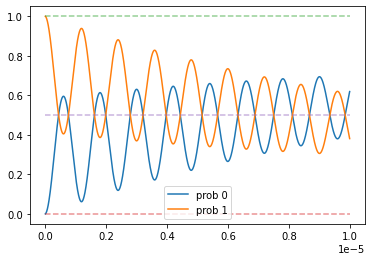

'\nfig = plt.figure(figsize=(7,7))\nims = []\n\nfor i in range(len(times)):\n\n    im = [plt.plot(times, rho_11, animated=True)]\n    \n    im.append(plt.plot(times, rho_00, animated=True))\n    im.append(plt.plot(times[i], rho_00[i], marker="o", animated=True))\n    im.append(plt.plot(times[i], rho_11[i], marker="o", animated=True))\n\n    ims += im\n'

In [5]:
t = 10e-6
steps = 100000
dt = t/steps
rho_0 = np.array([[0,0],[0,1]])
Gamma = 0.1e6 # MHz
Om = 2e6 # MHz
delta = 0
E = 0
E = ((1/420)*10**9 + (1/1013)*10**9)
H = np.array([[0,Om],[Om, E+delta]])

evo = evolution(steps, dt, rho_0, H, Gamma)
rho_00 = [evo[i][0,0] for i in range(steps+1)]
rho_11 = [evo[i][1,1] for i in range(steps+1)]
times = np.linspace(0,dt*(steps+1), steps+1)

plt.plot(times, rho_00, label="prob 0")
plt.plot(times, rho_11, label="prob 1")
plt.plot([0,times[-1]],[1,1],"--", alpha=0.5)
plt.plot([0,times[-1]],[0,0],"--", alpha=0.5)
plt.plot([0,times[-1]],[1/2,1/2],"--", alpha=0.5)
plt.legend()
plt.show()
"""
fig = plt.figure(figsize=(7,7))
ims = []

for i in range(len(times)):

    im = [plt.plot(times, rho_11, animated=True)]
    
    im.append(plt.plot(times, rho_00, animated=True))
    im.append(plt.plot(times[i], rho_00[i], marker="o", animated=True))
    im.append(plt.plot(times[i], rho_11[i], marker="o", animated=True))

    ims += im
"""
#ani = ArtistAnimation(fig, ims, interval=10, blit=True, repeat_delay=10)
#ani.save('single_atom.mp4')

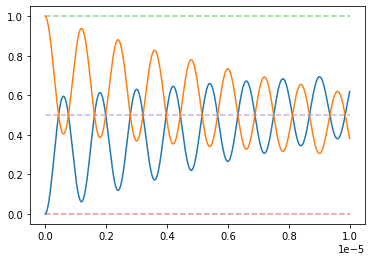

In [6]:
N1 = [np.trace(np.dot(evo[i],np.array([[1,0],[0,0]]))) for i in range(steps+1)]
N2 = [np.trace(np.dot(evo[i],np.array([[0,0],[0,1]]))) for i in range(steps+1)]

plt.plot(times, N1)
plt.plot(times, N2)
plt.plot([0,times[-1]],[1,1],"--", alpha=0.5)
plt.plot([0,times[-1]],[0,0],"--", alpha=0.5)
plt.plot([0,times[-1]],[1/2,1/2],"--", alpha=0.5)
plt.show()

Now I simulate a 3 level system, introducing a ground state, and intermediate state, and the rydber state. 
The laser couple the intermediate with the rydberg.

$$ H = 
\begin{pmatrix}
  \omega_g & 0 & 0 \\
  0 & \omega_i & \Omega\\ 
  0 & \Omega & \omega_r + \delta
\end{pmatrix} $$


In [7]:
def rho_dot(H, rho, Gamma, jump_op):
    sigma_down = jump_op
    sigma_up = jump_op.transpose().conjugate()
    return -1j*(np.dot(H,rho)-np.dot(rho, H))+Gamma*(np.dot(sigma_down,rho).dot(sigma_up)-(np.dot(sigma_up,sigma_down).dot(rho)+np.dot(rho,sigma_up).dot(sigma_down))/2)

def evolution(steps, dt, initial_state, H, Gamma, jump_op):
    state = initial_state
    state_evolution = [state]
    for i in range(steps):
        state = state + rho_dot(H, state, Gamma, jump_op)*dt
        state_evolution.append(state)
    return state_evolution

/var/folders/gq/pyfb45qx3wg52k7kygqcjy840000gn/T/ipykernel_2417/1038305130.py:4: RuntimeWarning: invalid value encountered in subtract
  return -1j*(np.dot(H,rho)-np.dot(rho, H))+Gamma*(np.dot(sigma_down,rho).dot(sigma_up)-(np.dot(sigma_up,sigma_down).dot(rho)+np.dot(rho,sigma_up).dot(sigma_down))/2)


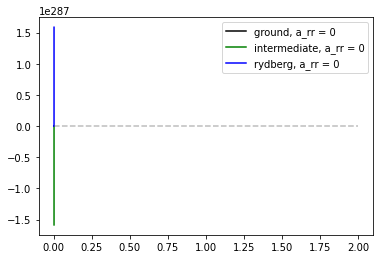

In [8]:
t = 2e-6
steps = 10000
dt = t/steps
rho_0 = np.array([
    [0,0,0],
    [0,0,0],
    [0,0,1]
    ])
Gamma = 3e6
Om = 0.8e6
delta = 0
E_g = 0
E_i = 749*10**12
E_r = 1048*10**12#-50e6
H = np.array([
    [E_g,0,0],
    [0,E_i, Om],
    [0, Om, E_r+delta]
    ])

jump_operators = [np.array([[0,1,0],[0,0,0],[0,0,0]])]#, np.array([[0,1,0],[0,0,0],[0,0,1]])]
linestyles = ["-", "--"]
jump_type = ["a_rr = 0", "a_rr=1"]

for k, jump_operator in enumerate(jump_operators):
    evo = evolution(steps, dt, rho_0, H, Gamma, jump_operator)
    rho_gg = [evo[i][0,0] for i in range(steps+1)]
    rho_ii = [evo[i][1,1] for i in range(steps+1)]
    rho_rr = [evo[i][2,2] for i in range(steps+1)]
    times = np.linspace(0,dt*(steps+1), steps+1)*10**6

    plt.plot(times, rho_gg, label="ground, "+jump_type[k], color="black", linestyle = linestyles[k])
    plt.plot(times, rho_ii, label="intermediate, "+jump_type[k], color="green", linestyle = linestyles[k])
    plt.plot(times, rho_rr, label="rydberg, "+jump_type[k], color="blue", linestyle = linestyles[k])
    plt.plot([0,times[-1]],[1,1],"--", alpha=0.2, color = "gray")
    plt.plot([0,times[-1]],[0,0],"--", alpha=0.2, color = "gray")
    plt.plot([0,times[-1]],[1/2,1/2],"--", alpha=0.2, color = "gray")
plt.legend()
plt.show()


In [9]:
0.5/14

0.03571428571428571

In [10]:
rho_0 = np.array([
    [0,0,0],
    [0,0.5,0],
    [0,0,0.5]
    ])

np.dot(sigma_down,rho_0).dot(sigma_up)

ValueError: shapes (2,2) and (3,3) not aligned: 2 (dim 1) != 3 (dim 0)